<a href="https://colab.research.google.com/github/KhmAsif/IMSE441Spring24/blob/main/Lab_5_Confidence_Interval_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

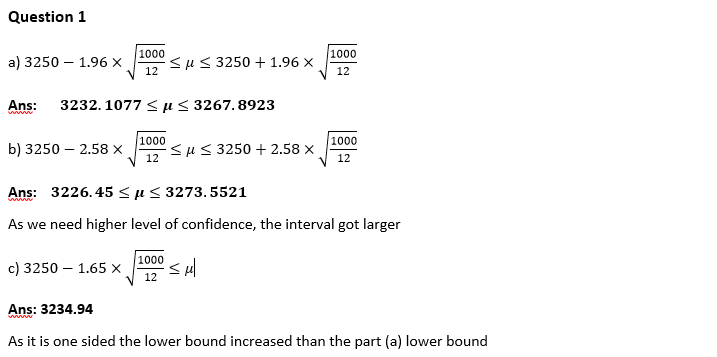

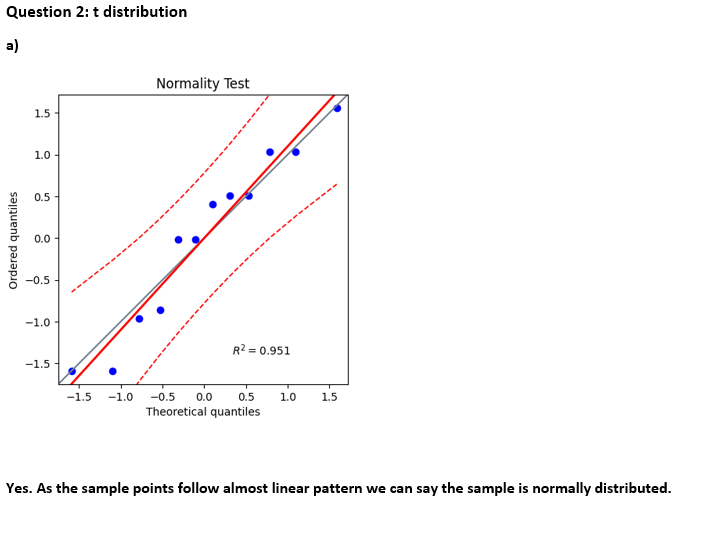

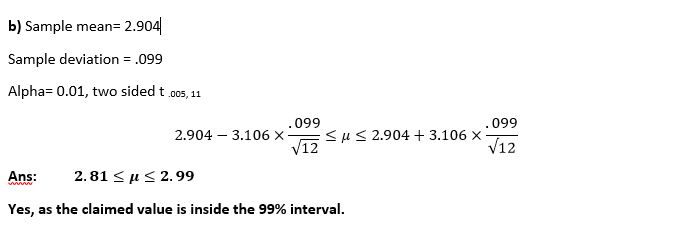

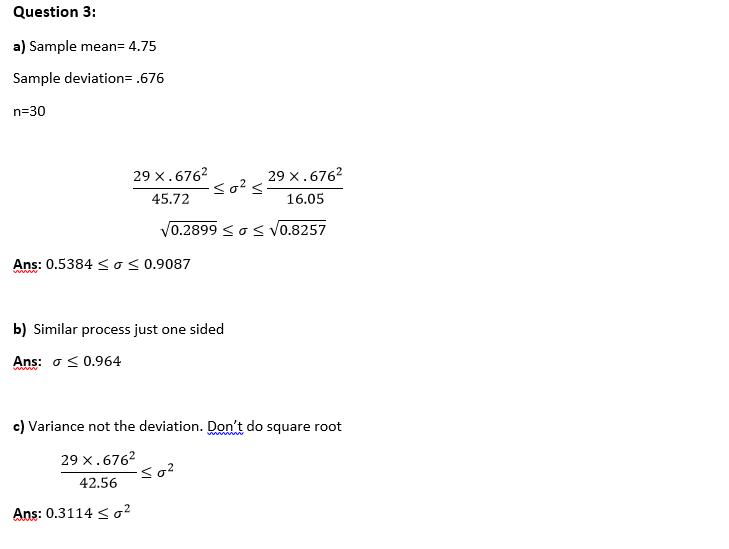

In [ ]:
!pip install pingouin
import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.3 MB/s eta 0:00:00


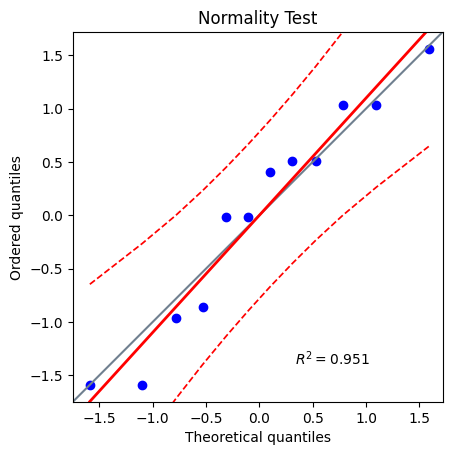

In [ ]:
# a. Is there evidence to support the assumption that the measurements are normally distributed?
#    Include a graphical display in your answer (python)
sample= [2.94, 3.00, 2.90, 2.75, 3.00, 2.95, 2.90, 2.75, 2.95, 2.82, 2.81, 3.05]
pg.qqplot(sample).set_title('Normality Test')
plt.show()

**Question 4:**

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441Spring24/main/Grip_strength.csv') # naming dataset "data"

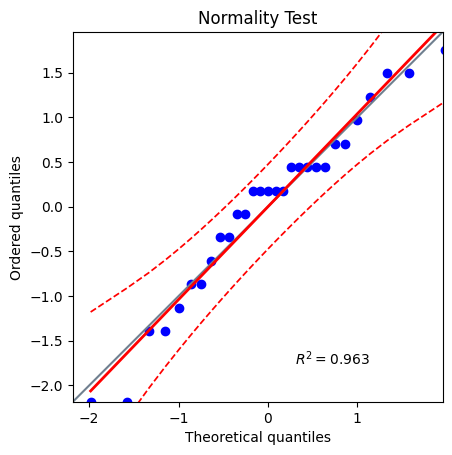

In [ ]:
# a. Use the practiced dataset for Grip strength. Construct the  95% and 99% confidence interval for 'Shoe Size'.
# Fisrt check for normality
pg.qqplot(data['Shoe_size']).set_title('Normality Test') #qqplot is the normality plot
plt.show()

So nromality can be assumed

In [ ]:
CI95= stats.ttest_1samp(data['Shoe_size'], popmean=data['Shoe_size'].mean()).confidence_interval(confidence_level=0.95,)
print(CI95)
CI99 = stats.ttest_1samp(data['Shoe_size'], popmean=data['Shoe_size'].mean()).confidence_interval(confidence_level=0.99,)
print(CI99)

ConfidenceInterval(low=9.418388968814083, high=10.891955858772123)
ConfidenceInterval(low=9.161265494716712, high=11.149079332869494)


In [ ]:
# b. Find the upper 95% confidence interval for 'Height'.
# Again check for normality

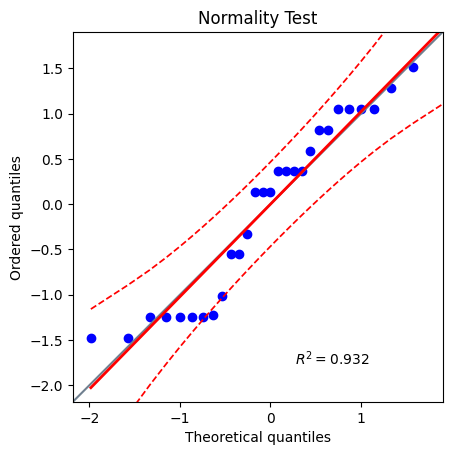

In [ ]:
pg.qqplot(data['Height']).set_title('Normality Test') #qqplot is the normality plot
plt.show()

We can assume as normal

In [ ]:
# b. Find the upper 95% confidence interval for 'Height'.
z_value=norm.ppf(.95)
n=len(data['Height'])
sample_std=data['Height'].std()
sample_mean= data['Height'].mean()
margin_error= z_value*sample_std/math.sqrt(n)

upper_1_sided= sample_mean + margin_error
print('One sided upper confidence interval is', upper_1_sided)

One sided upper confidence interval is 5.777091927838069


In [ ]:
# c. Find the lower 99% confidence interval for 'Height'.
z_value=norm.ppf(.99)
n=len(data['Height'])
t_value=stats.t.ppf(.99, df=n-1)
sample_std=data['Height'].std()
sample_mean= data['Height'].mean()
margin_error= z_value*sample_std/math.sqrt(n)

lower_1_sided= sample_mean - margin_error
print('One sided lower confidence interval is', lower_1_sided)

One sided lower confidence interval is 5.45027088938424


**Question 5**

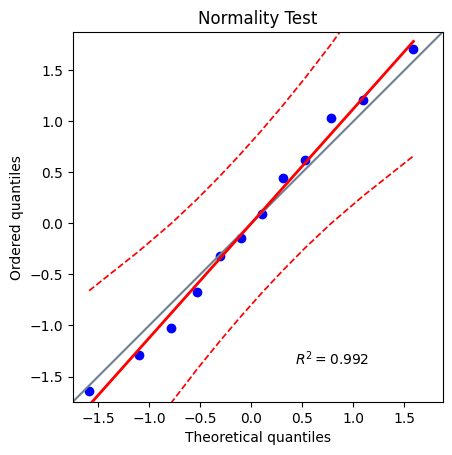

In [ ]:
Comp_strength = [2216, 2237, 2249, 2204, 2225, 2301, 2281, 2263, 2318, 2255, 2275, 2295]
pg.qqplot(Comp_strength).set_title('Normality Test') #qqplot is the normality plot
plt.show()

We can assume the data as normal

In [ ]:
# a. Construct a 95% two-sided confidence interval on the mean strength
Comp_strength=np.array(Comp_strength)
mean= sum(Comp_strength) / len(Comp_strength)
CI95a= stats.ttest_1samp(Comp_strength, popmean=mean).confidence_interval(confidence_level=0.95,)
print(CI95a)

ConfidenceInterval(low=2237.3170193288074, high=2282.5163140045256)


Alternative solution

In [ ]:
stats.t.interval(0.95,  df= n-1, loc=Comp_strength.mean(), scale=stats.sem(Comp_strength))

(2237.3170193288074, 2282.5163140045256)

In [ ]:
# b. Construct a 95% lower confidence bound on the mean strength.
n=len(Comp_strength)
t_value=stats.t.ppf(.95, df=n-1)
sample_mean=Comp_strength.mean()
sample_std=Comp_strength.std()
margin_error= t_value*sample_std/math.sqrt(n)

lower_1_sided= sample_mean - margin_error
print('One sided lower confidence interval is', lower_1_sided)

One sided lower confidence interval is 2242.2616250133365
